C:\Users\madst\AppData\Local\Temp\ipykernel_28572\2736219923.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp['Time'] = pd.to_datetime(gdp['Time'])


Data types in 'indu' dataframe:
Time     datetime64[ns]
Value             int64
dtype: object

Data types in 'cons' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object


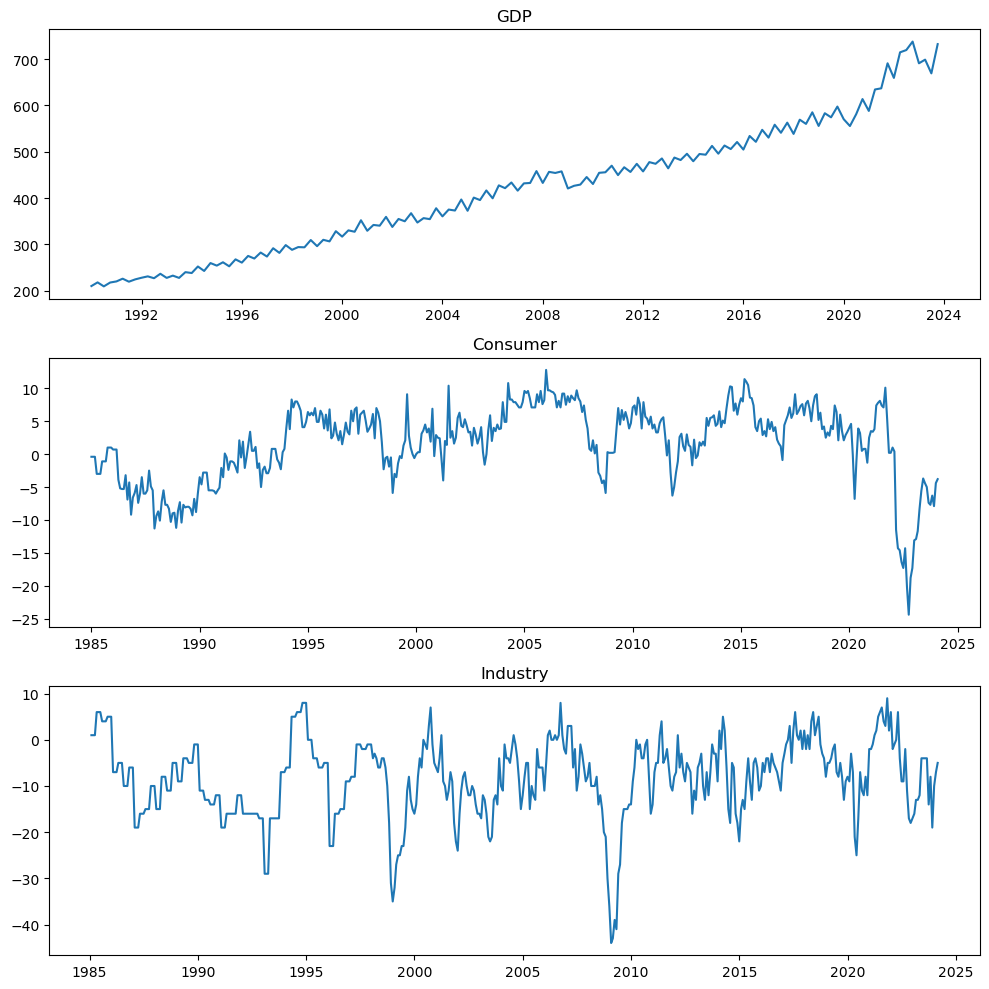

C:\Users\madst\AppData\Local\Temp\ipykernel_28572\3324521213.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  indu_quarterly = indu.resample('Q', on='Time').mean()
C:\Users\madst\AppData\Local\Temp\ipykernel_28572\3324521213.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cons_quarterly = cons.resample('Q', on='Time').mean()


Value           float64
Time     datetime64[ns]
dtype: object
Value           float64
Time     datetime64[ns]
dtype: object


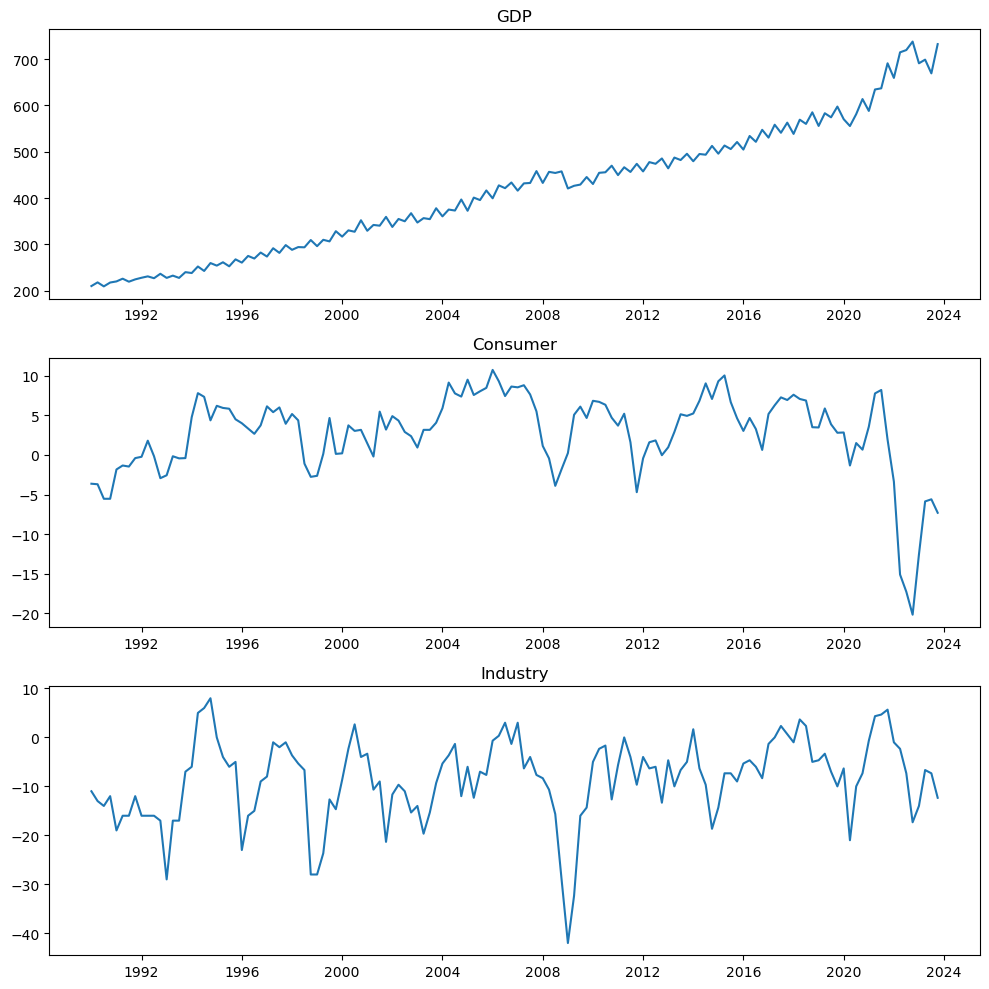

In [1]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

In [2]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train['Value'].dropna() , cons_train['Value'].dropna()], axis=1)
exog.columns = ['Value_indu', 'Value_cons']

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Create a list of all possible combinations of p, d, and q
param_combinations = list(itertools.product(p_values, d_values, q_values))

#Define the range of values for P, D, and Q
P_values = range(0, 3)
D_values = range(0, 3)
Q_values = range(0, 3)
m_values = range(0,4)

# Create a list of all possible combinations of P, D, and Q
seasonal_param_combinations = list(itertools.product(P_values, D_values, Q_values, m_values))


# Initialize variables to store the best model and its AIC value
best_model = None
best_aic = float('inf')

# Iterate over all combinations of p, d, and q
try:
    # Initialize variables to store the best model and its AIC value
    best_model = None
    best_aic = float('inf')

    # Iterate over all combinations of p, d, and q
    for params in param_combinations:
        for seasonal_params in seasonal_param_combinations:
            try:
                # Create the ARIMA model with the current parameters
                model = ARIMA(gdp_train['Value'].dropna(), order=params, exog=exog, seasonal_order=seasonal_params)

                # Fit the model
                model_fit = model.fit()

                # Get the AIC value of the model
                aic = model_fit.aic

                # Check if the current model has a lower AIC value than the best model so far
                if aic < best_aic:
                    best_model = model_fit
                    best_aic = aic
            except:
                continue
except:
    pass

# Print the summary of the best model
print(best_model.summary())

c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\madst\.conda\envs\myenv\Lib

                                     SARIMAX Results                                     
Dep. Variable:                             Value   No. Observations:                  104
Model:             ARIMA(0, 2, 2)x(2, 2, [1], 3)   Log Likelihood                   0.000
Date:                           Mon, 18 Mar 2024   AIC                             16.000
Time:                                   14:26:26   BIC                             36.515
Sample:                                        0   HQIC                            24.292
                                           - 104                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Value_indu    48.7134         -0       -inf      0.000      48.713      48.713
Value_cons  -808.2468         -0        inf

c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\madst\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


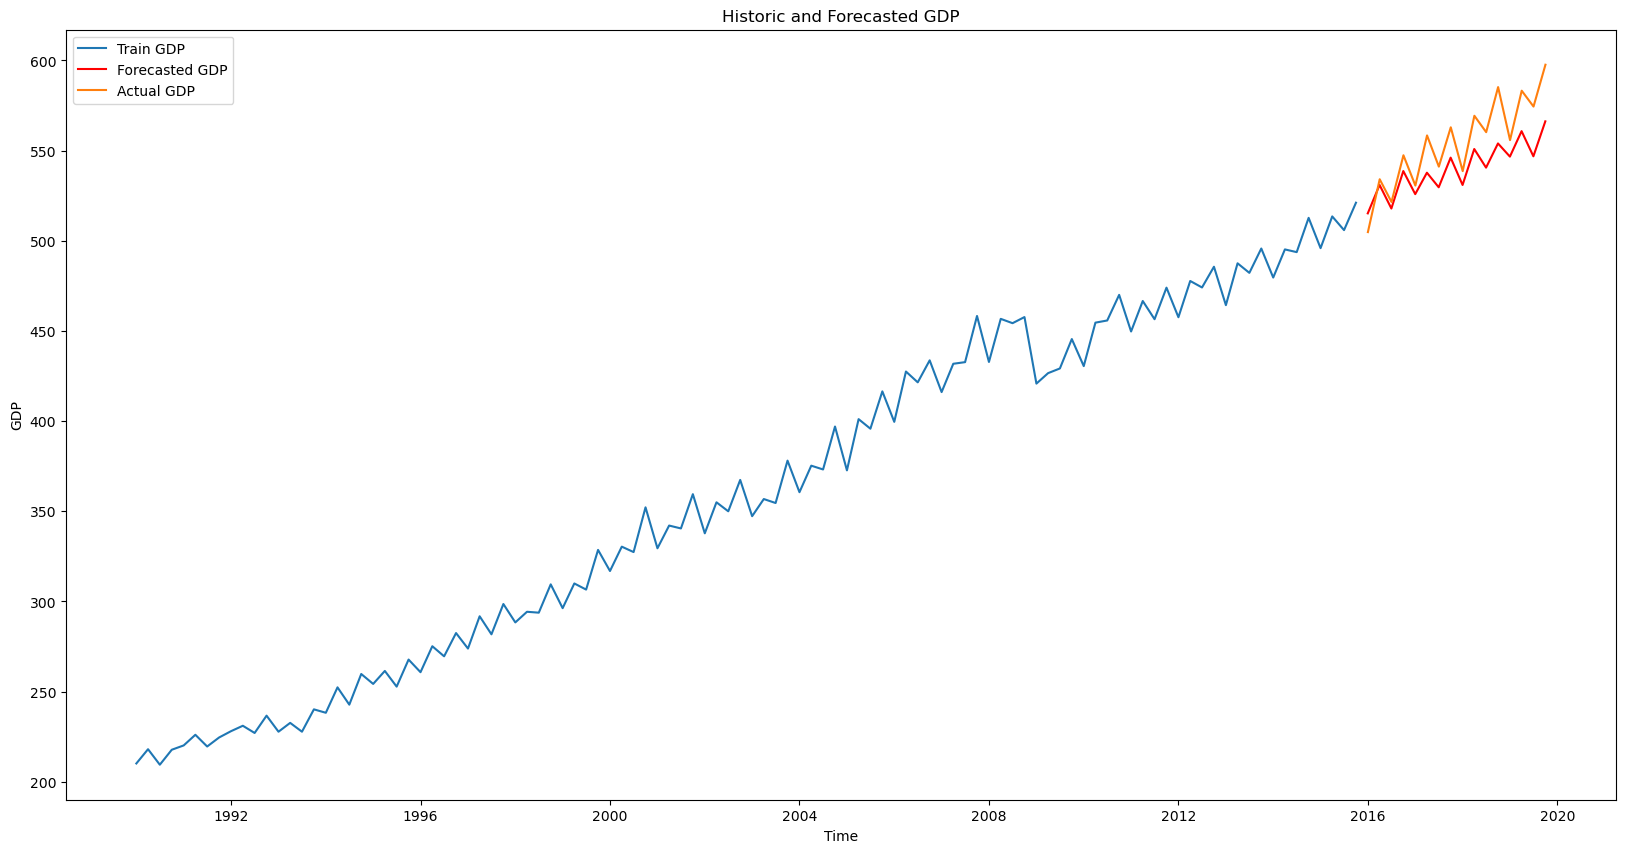

In [7]:
# Forecast 12 quarters ahead based on test indu and cons
fut_exog = pd.concat([indu_test['Value'].dropna(), cons_test['Value'].dropna()], axis=1)
fut_exog.columns = ['Value_indu', 'Value_cons']

forecast = model_fit.get_forecast(steps=16, exog=fut_exog.iloc[-16:])

# Get the forecasted values
forecast_values = forecast.predicted_mean

# Define the forecast dates
forecast_dates = pd.date_range(start=gdp_train['Time'].iloc[-1], periods=16, freq='QE')

# Plotting the forecasted values
# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [5]:
from statsmodels.tools.eval_measures import rmse
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

#The RMSE is 46.9, which is a good value for the forecasted GDP.

ValueError: operands could not be broadcast together with shapes (16,) (12,) 